In [36]:
import numpy as np
import pandas as pd
from seaborn import load_dataset, heatmap, boxplot
import matplotlib.pyplot as plt

In [24]:
data = load_dataset('mpg')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [25]:
data['high_mpg'] = np.where(data['mpg'] > np.quantile(data['mpg'],0.75), 'yes', 'no')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,high_mpg
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,no
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,no
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,no
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,no
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,no
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,no
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,yes
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,yes
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,no


In [26]:
data = data.drop(columns=['mpg'])
data

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,high_mpg
0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,no
1,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,no
2,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,no
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,no
4,8,302.0,140.0,3449,10.5,70,usa,ford torino,no
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,no
394,4,97.0,52.0,2130,24.6,82,europe,vw pickup,yes
395,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,yes
396,4,120.0,79.0,2625,18.6,82,usa,ford ranger,no


In [27]:
data.isna().sum()

cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
high_mpg        0
dtype: int64

In [28]:
data.isnull().sum()

cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
high_mpg        0
dtype: int64

In [29]:
data.isin(['',' ','-']).sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
high_mpg        0
dtype: int64

In [30]:
from scipy.stats import shapiro

In [31]:
stats, p_value = shapiro(data['horsepower'].dropna())
p_value

5.0220692907916354e-15

p-value < 0.05, so we will replace the missing values with median.

In [32]:
data = data.drop(columns=['name', 'origin'])
data

,cylinders,displacement,horsepower,weight,acceleration,model_year,high_mpg
0,8,307.0,130.0,3504,12.0,70,no
1,8,350.0,165.0,3693,11.5,70,no
2,8,318.0,150.0,3436,11.0,70,no
3,8,304.0,150.0,3433,12.0,70,no
4,8,302.0,140.0,3449,10.5,70,no
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,no
394,4,97.0,52.0,2130,24.6,82,yes
395,4,135.0,84.0,2295,11.6,82,yes
396,4,120.0,79.0,2625,18.6,82,no


In [33]:
data.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [34]:
data.loc[data['horsepower'].isna(),'horsepower'] = np.median(data['horsepower'].dropna())
data['horsepower'].isna().sum()

0

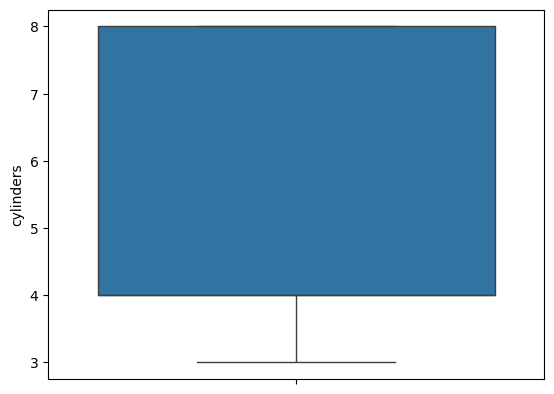

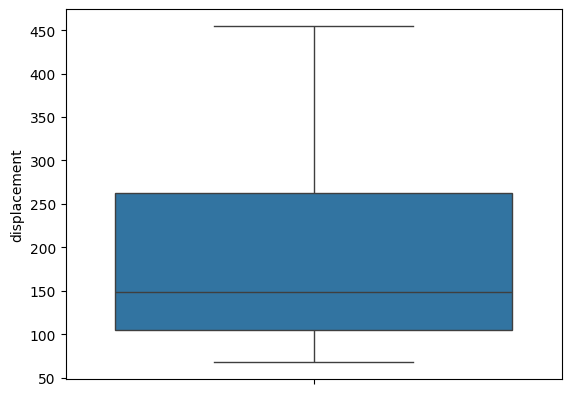

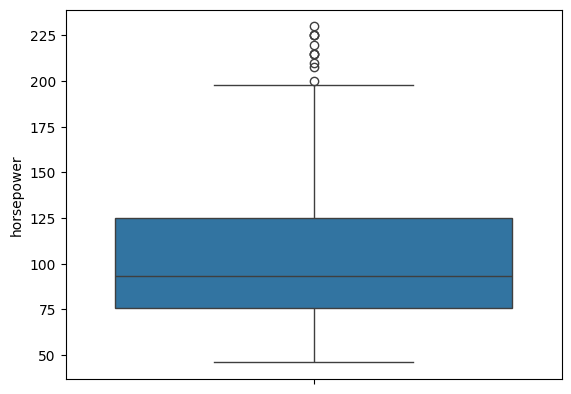

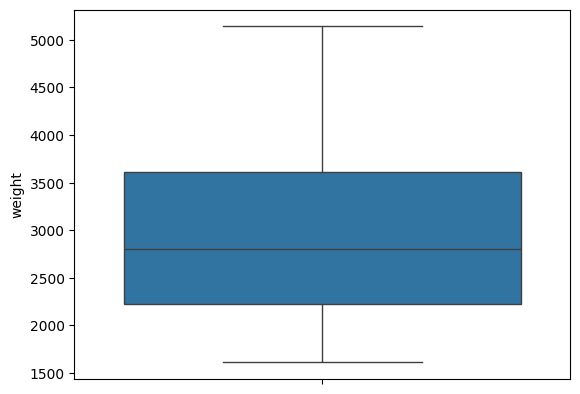

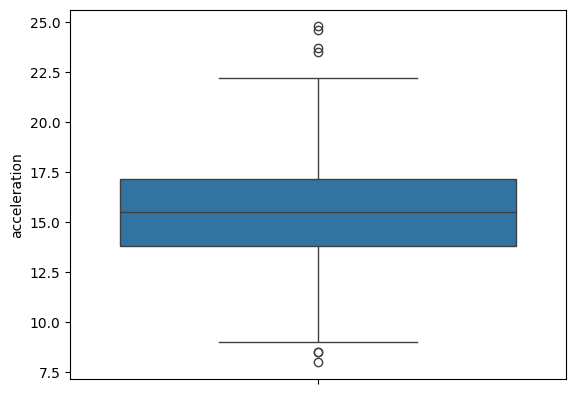

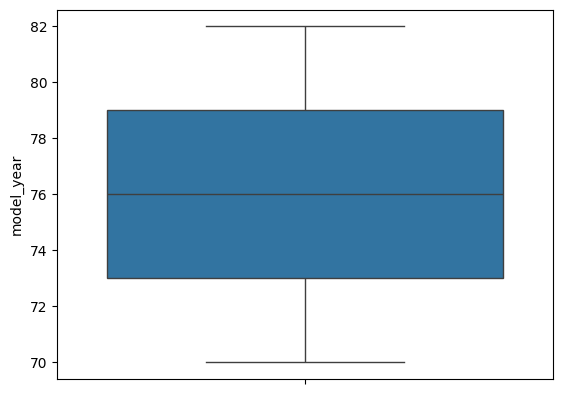

In [40]:
for col in data.drop(columns=['high_mpg']).columns:
    boxplot(data[col])
    plt.show()

horsepower and acceleration have some outliers. We've previosly seen that horsepower variable isn't normally distributed. For consistency, we'll use RobustScaler (median and IQR) to standardize them. They'll still exist but they will have a smaller impact on the output.

In [41]:
from sklearn.preprocessing import RobustScaler

In [44]:
scaler = RobustScaler()
data[['horsepower','acceleration']] = scaler.fit_transform(data[['horsepower','acceleration']])

In [49]:
from sklearn.decomposition import PCA

In [50]:
df_scaled = scaler.fit_transform(data.drop(columns=['high_mpg']))

pca = PCA()
pca.fit(df_scaled)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(data.drop(columns=['high_mpg']).columns))], index=data.drop(columns=['high_mpg']).columns)
print("Loadings:\n", loadings_df)

Loadings:
                    PC1       PC2       PC3       PC4       PC5       PC6
cylinders     0.379993  0.124958  0.036520 -0.098390 -0.059073  0.079532
displacement  0.619018  0.184671  0.055112 -0.095869 -0.050782 -0.069305
horsepower    0.755365  0.044211  0.033863  0.181446 -0.042731  0.007585
weight        0.536699  0.253181  0.076613 -0.012763  0.126275  0.011698
acceleration -0.624362  0.529216 -0.069634  0.047578 -0.025133 -0.000822
model_year   -0.291396  0.002240  0.542789  0.012939 -0.009251 -0.000544


In [51]:
data = data[['displacement','horsepower','acceleration','high_mpg']]
data

,displacement,horsepower,acceleration,high_mpg
0,307.0,0.744898,-1.044776,no
1,350.0,1.459184,-1.194030,no
2,318.0,1.153061,-1.343284,no
3,304.0,1.153061,-1.044776,no
4,302.0,0.948980,-1.492537,no
...,...,...,...,...
393,140.0,-0.153061,0.029851,no
394,97.0,-0.846939,2.716418,yes
395,135.0,-0.193878,-1.164179,yes
396,120.0,-0.295918,0.925373,no


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['high_mpg']),data['high_mpg'],test_size=0.2,random_state=33)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

results = pd.DataFrame(
    {'Actual':y_test,
    'Predicted':y_pred}
)
results

,Actual,Predicted
114,no,no
194,no,no
279,yes,yes
377,yes,yes
288,no,no
...,...,...
321,yes,no
163,no,no
360,yes,yes
290,no,no


In [55]:
from sklearn.metrics import confusion_matrix

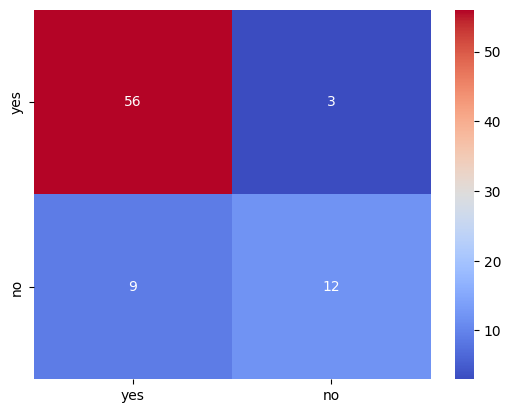

In [66]:
cm = confusion_matrix(y_test,y_pred)
labels = ['yes','no']
heatmap(cm,annot=True,cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.show()

In [57]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [69]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
recall = recall_score(y_test,y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

Accuracy: 0.85
Precision: 0.8307692307692308
Recall: 0.7602905569007263
F1: 0.7849462365591398


In [59]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = {'n_neighbors' :np.arange(3,25,2)}
grid_search = GridSearchCV(estimator=model,cv=5,param_grid=param_grid)
grid_search.fit(data.drop(columns=['high_mpg']), data['high_mpg'])
print("Best k:", grid_search.best_params_)

Best k: {'n_neighbors': 13}


In [65]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data.drop(columns=['high_mpg']),data['high_mpg'],test_size=0.2,random_state=33)

model2 = KNeighborsClassifier(n_neighbors=13)
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)

results = pd.DataFrame(
    {'Actual':y_test2,
    'Predicted':y_pred2}
)
results

,Actual,Predicted
114,no,yes
194,no,no
279,yes,yes
377,yes,yes
288,no,no
...,...,...
321,yes,yes
163,no,no
360,yes,no
290,no,no
